In [1]:
from sklearn.externals import joblib # to save model

from P300.data import load_data

# confusion matrix
from sklearn import metrics
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


import matplotlib.pyplot as plt
%matplotlib inline 


%load_ext autoreload
%autoreload 2

import numpy as np

In [2]:
# load classifier 
#subject='A'
#subject='B'
model_folder='model'
subject='AandB'
num_ch=64
clf_filename="{}/{}_LR_ch{}.model".format(model_folder, subject, num_ch)
clf = joblib.load(clf_filename)
print(clf)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


In [3]:
# calc prob for test 
#subject = 'A'
subject = 'B'
#X_train, Y_train, Code_train = load_data(subject, 'train', 85)
X_test, Y_test, Code_test = load_data(subject, 'test', 100)

loaded:
(100, 180, 896)
(100, 180, 1)
(100, 180, 1)
stacked:
(18000, 896)
(18000,)
(18000,)


In [4]:
# test
Y_est=clf.predict(X_test)

accuracy = sum(Y_test==Y_est) / len(Y_test)
print(accuracy)

metrics.confusion_matrix(Y_test,Y_est,labels=(1,-1))

0.7278888888888889


array([[ 2104,   896],
       [ 4002, 10998]])

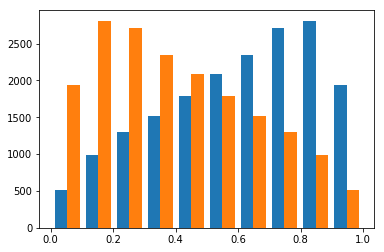

In [5]:

# predict prob
prob = clf.predict_proba(X_test)
plt.hist(prob)

log_prob = clf.predict_log_proba(X_test)
#plt.hist(log_prob)

In [6]:
np.max(log_prob)

-0.0026955959959683107

In [7]:
prob.shape

(18000, 2)

In [8]:
X_test.shape

(18000, 896)

In [9]:
log_prob.shape

(18000, 2)

(array([1.0000e+00, 7.0000e+00, 9.0000e+00, 4.2000e+01, 1.1500e+02,
        3.4100e+02, 7.8000e+02, 1.7590e+03, 4.3850e+03, 1.0561e+04]),
 array([-5.70185016e+00, -5.13193470e+00, -4.56201924e+00, -3.99210379e+00,
        -3.42218833e+00, -2.85227288e+00, -2.28235742e+00, -1.71244196e+00,
        -1.14252651e+00, -5.72611052e-01, -2.69559600e-03]),
 <a list of 10 Patch objects>)

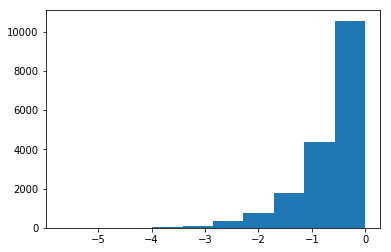

In [10]:
plt.hist(log_prob[:,0])

(array([  12.,  159., 1152., 3920., 6129., 4426., 1717.,  425.,   52.,
           8.]),
 array([-5.91478785, -4.75345859, -3.59212932, -2.43080006, -1.2694708 ,
        -0.10814153,  1.05318773,  2.21451699,  3.37584626,  4.53717552,
         5.69850479]),
 <a list of 10 Patch objects>)

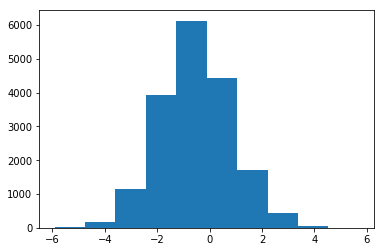

In [11]:
plt.hist(log_prob[:,1]-log_prob[:,0])

## decode after averaging over trials

In [12]:
from P300.data import sort_by_code

XX, YY, CC= sort_by_code(X_test, Y_test, Code_test)

In [13]:
print(XX.shape)
print(YY.shape)
print(CC.shape)

(18000, 896)
(18000, 1)
(18000, 1)


In [14]:
#Yest=clf.predict(XX)
#clf.score(XX, YY)
log_prob = clf.predict_log_proba(XX)
log_prob=log_prob.reshape(-1,15,12,2)
log_prob.shape

(100, 15, 12, 2)

In [15]:
# accumulate log_prob over trials
log_prob_diff=np.sum(log_prob,axis=1)[:,:,1]-np.sum(log_prob,axis=1)[:,:,0]
log_prob_diff.shape

(100, 12)

In [16]:
YY = YY.reshape(-1,15,12)
YY.shape
#YY[1,:,1]
YY_trial=YY[:,0,:]
YY_trial.shape

(100, 12)

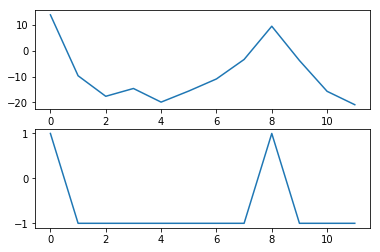

In [17]:
epoch = 0
plt.subplot(211)
plt.plot(log_prob_diff[epoch,:])
plt.subplot(212)
plt.plot(YY_trial[epoch,:])

In [18]:
np.sum(log_prob_diff > 0 , axis=1)

array([2, 2, 3, 1, 3, 2, 4, 3, 3, 4, 1, 3, 2, 2, 2, 2, 3, 3, 3, 1, 0, 3,
       3, 0, 0, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2,
       3, 3, 2, 2, 2, 2, 5, 4, 2, 3, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 3, 2, 2, 2, 4, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 4, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2])

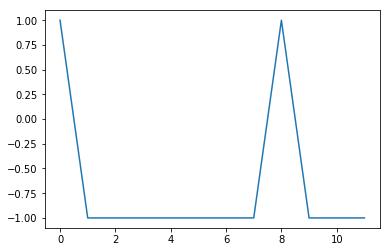

In [19]:
from P300.data import decode_rc

decoded = decode_rc(log_prob_diff)
decoded.shape
plt.plot(decoded[epoch,:])

In [20]:
from P300.data import calc_accuracy_rc

calc_accuracy_rc(YY_trial, decoded)

0.91